In [2]:
import numpy as np
import pandas as pd
import json
import math
import matplotlib.pyplot as plt
from keras.models import load_model

Using TensorFlow backend.
C:\Users\nemci\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nemci\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nemci\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nemci\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
from r_eq_calculator import calculate_requivalent_radii

In [4]:
#načítanie dát AH Aur.json
f1=open("AH Aur.json")
d1=json.load(f1)
x1=d1["system_parameters"] #parametre
v1=(d1["interpolated_light_curves"]["V"]) #krivka V
b1=(d1["interpolated_light_curves"]["B"]) #krivka B
f1.close()
x1 #výpis parametrov

{'q': 0.169,
 'inc': 75.46,
 'omega1': 2.08,
 'omega2': 2.08,
 'T1': 6215.0,
 'T2': 6141.0,
 'P': 0.49410834,
 'Type': 'overcontact',
 'Spot': 'N',
 'Ref': 'http://liber.onu.edu.ua/pdf/astro/all/OAP_14/000_pdf/vanko.pdf'}

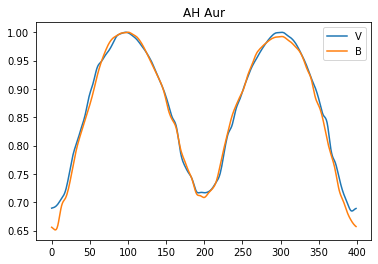

In [5]:
#vykreslenie kriviek
plt.plot(v1, label="V")
plt.plot(b1, label="B")
plt.legend()
plt.title("AH Aur")
plt.show()

In [6]:
df=pd.DataFrame([x1]*2, index=[0,1])
df["name"]=["AH Aur"]*2
df["filter"]=["V", "B"]
df["curve"]=[v1,b1]
df

,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve
0,0.169,75.46,2.08,2.08,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,V,"[0.6897, 0.6901, 0.6904, 0.691, 0.6916, 0.6925..."
1,0.169,75.46,2.08,2.08,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,B,"[0.656, 0.6549, 0.6537, 0.6525, 0.6516, 0.6513..."


In [7]:
#načítanie všetkých json súborov postupne
f2=open("AKHer.json")
d2=json.load(f2)
x2=d2["system_parameters"] #parametre
df=df.append([x2]*4, ignore_index=True)
df.loc[[2,3,4,5],["name"]]="AKHer"
df.loc[[2,3,4,5],["filter"]]=["V", "I", "R", "B"]
df.at[2,"curve"]=d2["interpolated_light_curves"]["V"]
df.at[3,"curve"]=d2["interpolated_light_curves"]["I"]
df.at[4,"curve"]=d2["interpolated_light_curves"]["R"]
df.at[5,"curve"]=d2["interpolated_light_curves"]["B"]

f2.close()


In [8]:
f3=open("ASCrB.json")
d3=json.load(f3)
x3=d3["system_parameters"] #parametre
df=df.append([x3]*4, ignore_index=True)
df.loc[[6,7,8,9],["name"]]="ASCrB"
df.loc[[6,7,8,9],["filter"]]=["V", "I", "R", "B"]
df.at[6,"curve"]=d3["interpolated_light_curves"]["V"]
df.at[7,"curve"]=d3["interpolated_light_curves"]["I"]
df.at[8,"curve"]=d3["interpolated_light_curves"]["R"]
df.at[9,"curve"]=d3["interpolated_light_curves"]["B"]

f3.close()

In [9]:
# f4=open("ASSer.json")
# d4=json.load(f4)
# x4=d4["system_parameters"] #parametre
# df=df.append([x4]*3, ignore_index=True)
# df.loc[[10,11,12],["name"]]="ASSer"
# df.loc[[10,11,12],["filter"]]=["V", "R", "B"]
# df.at[10,"curve"]=d4["interpolated_light_curves"]["V"]
# df.at[11,"curve"]=d4["interpolated_light_curves"]["R"]
# df.at[12,"curve"]=d4["interpolated_light_curves"]["B"]

# f4.close()

In [10]:
df.tail()

,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve
5,0.270,81.7,2.357,2.357,6500.0,6180.0,0.421522,contact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,B,"[0.6127, 0.6129, 0.6131, 0.6136, 0.6142, 0.615..."
6,0.172,78.4,2.096,2.096,6500.0,6498.0,0.380659,overcontact,N,https://www.sciencedirect.com/science/article/...,ASCrB,V,"[0.6961, 0.6958, 0.6957, 0.6959, 0.6963, 0.697..."
7,0.172,78.4,2.096,2.096,6500.0,6498.0,0.380659,overcontact,N,https://www.sciencedirect.com/science/article/...,ASCrB,I,"[0.7145, 0.7137, 0.713, 0.7128, 0.7129, 0.7134..."
8,0.172,78.4,2.096,2.096,6500.0,6498.0,0.380659,overcontact,N,https://www.sciencedirect.com/science/article/...,ASCrB,R,"[0.6996, 0.6992, 0.6991, 0.6996, 0.7005, 0.701..."
9,0.172,78.4,2.096,2.096,6500.0,6498.0,0.380659,overcontact,N,https://www.sciencedirect.com/science/article/...,ASCrB,B,"[0.6762, 0.678, 0.6797, 0.6807, 0.6811, 0.6811..."


In [11]:
f5=open("BHCas.json")
d5=json.load(f5)
x5=d5["system_parameters"] #parametre
df=df.append([x5]*4, ignore_index=True)
df.loc[[10,11,12,13],["name"]]="BHCas"
df.loc[[10,11,12,13],["filter"]]=["V", "I", "R", "B"]
df.at[10,"curve"]=d5["interpolated_light_curves"]["V"]
df.at[11,"curve"]=d5["interpolated_light_curves"]["I"]
df.at[12,"curve"]=d5["interpolated_light_curves"]["R"]
df.at[13,"curve"]=d5["interpolated_light_curves"]["B"]

f5.close()

In [12]:
f6=open("BQAri.json")
d6=json.load(f6)
x6=d6["system_parameters"] #parametre
df=df.append([x6]*2, ignore_index=True)
df.loc[[14,15],["name"]]="BQAri"
df.loc[[14,15],["filter"]]=["V", "R"]
df.at[14,"curve"]=d6["interpolated_light_curves"]["V"]
df.at[15,"curve"]=d6["interpolated_light_curves"]["R"]

f6.close()

In [13]:
f7=open("BXDra.json")
d7=json.load(f7)
x7=d7["system_parameters"] #parametre
df=df.append([x7]*3, ignore_index=True)
df.loc[[16,17,18],["name"]]="BXDra"
df.loc[[16,17,18],["filter"]]=["V", "R", "B"]
df.at[16,"curve"]=d7["interpolated_light_curves"]["V"]
df.at[17,"curve"]=d7["interpolated_light_curves"]["R"]
df.at[18,"curve"]=d7["interpolated_light_curves"]["B"]

f7.close()

In [14]:
f8=open("GSC 0763-0572.json")
d8=json.load(f8)
x8=d8["system_parameters"] #parametre
df=df.append([x8]*3, ignore_index=True)
df.loc[[19,20,21],["name"]]="GSC 0763-0572"
df.loc[[19,20,21],["filter"]]=["V", "I", "R"]
df.at[19,"curve"]=d8["interpolated_light_curves"]["V"]
df.at[20,"curve"]=d8["interpolated_light_curves"]["I"]
df.at[21,"curve"]=d8["interpolated_light_curves"]["R"]

f8.close()

In [15]:
f9=open("HIDra.json")
d9=json.load(f9)
x9=d9["system_parameters"] #parametre
df=df.append([x9]*4, ignore_index=True)
df.loc[[22,23,24,25],["name"]]="HIDra"
df.loc[[22,23,24,25],["filter"]]=["V", "I", "R", "B"]
df.at[22,"curve"]=d9["interpolated_light_curves"]["V"]
df.at[23,"curve"]=d9["interpolated_light_curves"]["I"]
df.at[24,"curve"]=d9["interpolated_light_curves"]["R"]
df.at[25,"curve"]=d9["interpolated_light_curves"]["B"]

f9.close()

In [16]:
f10=open("UVLyn.json")
d10=json.load(f10)
x10=d10["system_parameters"] #parametre
df=df.append([x10]*2, ignore_index=True)
df.loc[[26,27],["name"]]="UVLyn"
df.loc[[26,27],["filter"]]=["V", "B"]
df.at[26,"curve"]=d10["interpolated_light_curves"]["V"]
df.at[27,"curve"]=d10["interpolated_light_curves"]["B"]
f10.close()

In [17]:
f11=open("V1128Tau.json")
d11=json.load(f11)
x11=d11["system_parameters"] #parametre
df=df.append([x11]*3, ignore_index=True)
df.loc[[28,29,30],["name"]]="V1128Tau"
df.loc[[28,29,30],["filter"]]=["V", "R", "B"]
df.at[28,"curve"]=d11["interpolated_light_curves"]["V"]
df.at[29,"curve"]=d11["interpolated_light_curves"]["R"]
df.at[30,"curve"]=d11["interpolated_light_curves"]["B"]
f11.close()

In [18]:
f12=open("V2612Oph.json")
d12=json.load(f12)
x12=d12["system_parameters"] #parametre
df=df.append([x12]*4, ignore_index=True)
df.loc[[31,32,33,34],["name"]]="V2612Oph"
df.loc[[31,32,33,34],["filter"]]=["V", "I", "R", "B"]
df.at[31,"curve"]=d12["interpolated_light_curves"]["V"]
df.at[32,"curve"]=d12["interpolated_light_curves"]["I"]
df.at[33,"curve"]=d12["interpolated_light_curves"]["R"]
df.at[34,"curve"]=d12["interpolated_light_curves"]["B"]
f12.close()

In [19]:
f13=open("V2790Ori.json")
d13=json.load(f13)
x13=d13["system_parameters"] #parametre
df=df.append([x13]*3, ignore_index=True)
df.loc[[35,36,37],["name"]]="V2790Ori"
df.loc[[35,36,37],["filter"]]=["V", "R", "B"]
df.at[35,"curve"]=d13["interpolated_light_curves"]["V"]
df.at[36,"curve"]=d13["interpolated_light_curves"]["R"]
df.at[37,"curve"]=d13["interpolated_light_curves"]["B"]
f13.close()

In [20]:
f14=open("V396Mon.json")
d14=json.load(f14)
x14=d14["system_parameters"] #parametre
df=df.append([x14]*2, ignore_index=True)
# df.loc[[41,42,43],["name"]]="V369Mon"
# df.loc[[41,42,43],["filter"]]=["V", "B", "I"]
df.loc[[38,39],["name"]]="V369Mon"
df.loc[[38,39],["filter"]]=["V", "B"]
df.at[38,"curve"]=d14["interpolated_light_curves"]["V"]
df.at[39,"curve"]=d14["interpolated_light_curves"]["B"]
# df.at[43,"curve"]=d14["interpolated_light_curves"]["I"]
f14.close()

In [21]:
f15=open("YZPho.json")
d15=json.load(f15)
x15=d15["system_parameters"] #parametre
df=df.append([x15]*3, ignore_index=True)
df.loc[[40,41,42],["name"]]="YZPho"
df.loc[[40,41,42],["filter"]]=["V", "I", "R"]
df.at[40,"curve"]=d15["interpolated_light_curves"]["V"]
df.at[41,"curve"]=d15["interpolated_light_curves"]["I"]
df.at[42,"curve"]=d15["interpolated_light_curves"]["R"]
f15.close()

In [22]:
df

,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve
0,0.169,75.46,2.080,2.080,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,V,"[0.6897, 0.6901, 0.6904, 0.691, 0.6916, 0.6925..."
1,0.169,75.46,2.080,2.080,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,B,"[0.656, 0.6549, 0.6537, 0.6525, 0.6516, 0.6513..."
2,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,contact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,V,"[0.6688, 0.6646, 0.6608, 0.6572, 0.6539, 0.651..."
3,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,contact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,I,"[0.6932, 0.6884, 0.6841, 0.6804, 0.6773, 0.674..."
4,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,contact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,R,"[0.6524, 0.6518, 0.652, 0.6532, 0.6554, 0.6582..."
5,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,contact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,B,"[0.6127, 0.6129, 0.6131, 0.6136, 0.6142, 0.615..."
6,0.172,78.40,2.096,2.096,6500.0,6498.0,0.380659,overcontact,N,https://www.sciencedirect.com/science/article/...,ASCrB,V,"[0.6961, 0.6958, 0.6957, 0.6959, 0.6963, 0.697..."
7,0.172,78.40,2.096,2.096,6500.0,6498.0,0.380659,overcontact,N,https://www.sciencedirect.com/science/article/...,ASCrB,I,"[0.7145, 0.7137, 0.713, 0.7128, 0.7129, 0.7134..."
8,0.172,78.40,2.096,2.096,6500.0,6498.0,0.380659,overcontact,N,https://www.sciencedirect.com/science/article/...,ASCrB,R,"[0.6996, 0.6992, 0.6991, 0.6996, 0.7005, 0.701..."
9,0.172,78.40,2.096,2.096,6500.0,6498.0,0.380659,overcontact,N,https://www.sciencedirect.com/science/article/...,ASCrB,B,"[0.6762, 0.678, 0.6797, 0.6807, 0.6811, 0.6811..."


In [23]:
df["t1_t2"]=df.T1/df.T2
#df=df[["name", "filter", "Spot", "t1_t2", "inc", "q", "omega1", "omega2", "curve"]]
df.head()

2022-03-31 19:30:48,494 - 3364 - numexpr.utils - INFO: NumExpr defaulting to 8 threads.


,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve,t1_t2
0,0.169,75.46,2.080,2.080,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,V,"[0.6897, 0.6901, 0.6904, 0.691, 0.6916, 0.6925...",1.01205
1,0.169,75.46,2.080,2.080,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,B,"[0.656, 0.6549, 0.6537, 0.6525, 0.6516, 0.6513...",1.01205
2,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,contact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,V,"[0.6688, 0.6646, 0.6608, 0.6572, 0.6539, 0.651...",1.05178
3,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,contact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,I,"[0.6932, 0.6884, 0.6841, 0.6804, 0.6773, 0.674...",1.05178
4,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,contact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,R,"[0.6524, 0.6518, 0.652, 0.6532, 0.6554, 0.6582...",1.05178


In [24]:
# column TYPE - detected to detached
df["Type"].replace({"contact": "overcontact"}, inplace=True)
df.head()

,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve,t1_t2
0,0.169,75.46,2.080,2.080,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,V,"[0.6897, 0.6901, 0.6904, 0.691, 0.6916, 0.6925...",1.01205
1,0.169,75.46,2.080,2.080,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,B,"[0.656, 0.6549, 0.6537, 0.6525, 0.6516, 0.6513...",1.01205
2,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,V,"[0.6688, 0.6646, 0.6608, 0.6572, 0.6539, 0.651...",1.05178
3,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,I,"[0.6932, 0.6884, 0.6841, 0.6804, 0.6773, 0.674...",1.05178
4,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,R,"[0.6524, 0.6518, 0.652, 0.6532, 0.6554, 0.6582...",1.05178


In [25]:
# column Spot - n to N; y to Y
df["Spot"].replace({"n": "N", "y": "Y"}, inplace=True)
df.head()

,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve,t1_t2
0,0.169,75.46,2.080,2.080,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,V,"[0.6897, 0.6901, 0.6904, 0.691, 0.6916, 0.6925...",1.01205
1,0.169,75.46,2.080,2.080,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,B,"[0.656, 0.6549, 0.6537, 0.6525, 0.6516, 0.6513...",1.01205
2,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,V,"[0.6688, 0.6646, 0.6608, 0.6572, 0.6539, 0.651...",1.05178
3,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,I,"[0.6932, 0.6884, 0.6841, 0.6804, 0.6773, 0.674...",1.05178
4,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,R,"[0.6524, 0.6518, 0.652, 0.6532, 0.6554, 0.6582...",1.05178


In [26]:
df["primary__equivalent_radius"] = df.apply(lambda row: calculate_requivalent_radii(row['q'], row['omega1'], row['omega2'])[0], axis = 1)

2022-03-31 19:30:49,197 - 3364 - binary_system.system - INFO: initialising object BinarySystem
2022-03-31 19:30:49,301 - 3364 - binary_system.system - INFO: setting discretization factor of secondary component to 8.00 according to discretization factor of the companion.
2022-03-31 19:30:49,319 - 3364 - binary_system.system - INFO: initialising object BinarySystem
2022-03-31 19:30:49,410 - 3364 - binary_system.system - INFO: setting discretization factor of secondary component to 8.00 according to discretization factor of the companion.
2022-03-31 19:30:49,418 - 3364 - binary_system.system - INFO: initialising object BinarySystem
2022-03-31 19:30:49,539 - 3364 - binary_system.system - INFO: setting discretization factor of secondary component to 8.00 according to discretization factor of the companion.
2022-03-31 19:30:49,555 - 3364 - binary_system.system - INFO: initialising object BinarySystem
2022-03-31 19:30:49,629 - 3364 - binary_system.system - INFO: setting discretization factor 

In [27]:
df["secondary__equivalent_radius"] = df.apply(lambda row: calculate_requivalent_radii(row['q'], row['omega1'], row['omega2'])[1], axis = 1)

2022-03-31 19:30:53,304 - 3364 - binary_system.system - INFO: initialising object BinarySystem
2022-03-31 19:30:53,386 - 3364 - binary_system.system - INFO: setting discretization factor of secondary component to 8.00 according to discretization factor of the companion.
2022-03-31 19:30:53,402 - 3364 - binary_system.system - INFO: initialising object BinarySystem
2022-03-31 19:30:53,484 - 3364 - binary_system.system - INFO: setting discretization factor of secondary component to 8.00 according to discretization factor of the companion.
2022-03-31 19:30:53,489 - 3364 - binary_system.system - INFO: initialising object BinarySystem
2022-03-31 19:30:53,573 - 3364 - binary_system.system - INFO: setting discretization factor of secondary component to 8.00 according to discretization factor of the companion.
2022-03-31 19:30:53,588 - 3364 - binary_system.system - INFO: initialising object BinarySystem
2022-03-31 19:30:53,672 - 3364 - binary_system.system - INFO: setting discretization factor 

In [28]:
df.to_csv("observed_over.csv")

In [29]:
# X=[]
# for row in df["curve"]:
#     X.append(row)
# X=np.array(X)

In [30]:
# pred_t1t2=m_t1t2.predict(X)
# pred_inc=m_inc.predict(X)
# pred_mr=m_mr.predict(X)
# pred_psp=m_psp.predict(X)

In [31]:
# pred_t1t2=np.reshape(pred_t1t2, len(pred_t1t2))
# pred_inc=np.reshape(pred_inc, len(pred_inc))
# pred_mr=np.reshape(pred_mr, len(pred_mr))
# pred_psp=np.reshape(pred_psp, len(pred_psp))

In [32]:
# df["t1_t2_predicted"]=pred_t1t2
# df["inc_predicted"]=pred_inc
# df["q_predicted"]=pred_mr
# df["omega1_predicted"]=pred_psp

In [33]:
# df.inc=(df.inc*math.pi)/180.0
# df

In [34]:
# spot=df[["name", "Spot"]].drop_duplicates().reset_index()
# spot.Spot=spot.Spot.map({"N":"", "Y":"SPOT"})
# spot

In [35]:
# true_t1_t2=df[["t1_t2", "name"]].groupby(["name"]).mean()
# true_t1_t2

In [36]:
# names=pd.DataFrame(data={"name":true_t1_t2.index})
# t1_t2_B=pd.merge(names, df[df["filter"]=="B"][["t1_t2_predicted", "name"]], how="left")
# t1_t2_V=pd.merge(names, df[df["filter"]=="V"][["t1_t2_predicted", "name"]], how="left")
# t1_t2_R=pd.merge(names, df[df["filter"]=="R"][["t1_t2_predicted", "name"]], how="left")
# t1_t2_I=pd.merge(names, df[df["filter"]=="I"][["t1_t2_predicted", "name"]], how="left")

In [37]:
# fig = plt.figure(figsize=(8,4))
# ax = fig.add_axes([0,0,1,1])
# plt.scatter(true_t1_t2.index, true_t1_t2.t1_t2, c="red", marker="_", s=500, label="true t1/t2")
# plt.xticks(rotation=45, ha='right')
# plt.grid(b="on")
# scatter=plt.scatter(df.name, df.t1_t2_predicted, c=df["filter"].astype("category").cat.codes)
# plt.legend(handles=scatter.legend_elements()[0], title="filter", labels=["B","I","R","V"])
# plt.show()

In [38]:
# fig, ax = plt.subplots(figsize=(20,7))
# barWidth = 0.12
# br1 = np.arange(len(names))
# br2 = [x + barWidth for x in br1]
# br3 = [x + barWidth for x in br2]
# br4 = [x + barWidth for x in br3]
# br5 = [x + barWidth for x in br4]
# r=ax.bar(br1, true_t1_t2.t1_t2, barWidth, label='true t1/t2', color="limegreen")
# ax.bar(br2, t1_t2_V.t1_t2_predicted, barWidth, label='prediction on filter V', color="moccasin")
# ax.bar(br3, t1_t2_B.t1_t2_predicted, barWidth, label='prediction on filter B', color="cornflowerblue")
# ax.bar(br4, t1_t2_I.t1_t2_predicted, barWidth, label='prediction on filter I', color="silver")
# ax.bar(br5, t1_t2_R.t1_t2_predicted, barWidth, label='prediction on filter R', color="salmon")
# plt.xticks(br1, true_t1_t2.index, rotation=45, ha='right')
# ax.scatter(spot.name, [0]*15, c=spot.Spot.astype("category").cat.codes)
# plt.title("T1/T2 predictions - overcontact")
# plt.ylabel("t1/t2")
# ax.grid(False)
# plt.legend()
# plt.grid(b="on")
# #def autolabel(rects):
# #   n=0
# #    for rect in rects:
# #        height = rect.get_height()
# #        ax.text(rect.get_x() + rect.get_width()/2. +0.23 , 0.02,
# #                s=spot.Spot[n],
# #                ha='center', va='bottom', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))
# #        n=n+1
        
# #autolabel(r)
# plt.show()

In [39]:
# true_inc=df[["inc", "name"]].groupby(["name"]).mean()
# true_inc.inc=(true_inc.inc*math.pi)/180.0
# inc_B=pd.merge(names, df[df["filter"]=="B"][["inc_predicted", "name"]], how="left")
# inc_V=pd.merge(names, df[df["filter"]=="V"][["inc_predicted", "name"]], how="left")
# inc_R=pd.merge(names, df[df["filter"]=="R"][["inc_predicted", "name"]], how="left")
# inc_I=pd.merge(names, df[df["filter"]=="I"][["inc_predicted", "name"]], how="left")

In [40]:
# fig, ax = plt.subplots(figsize=(20,7))
# barWidth = 0.12
# br1 = np.arange(len(names))
# br2 = [x + barWidth for x in br1]
# br3 = [x + barWidth for x in br2]
# br4 = [x + barWidth for x in br3]
# br5 = [x + barWidth for x in br4]
# r=plt.bar(br1, true_inc.inc, barWidth, label='true inclination', color="limegreen")
# plt.bar(br2, inc_V.inc_predicted, barWidth, label='prediction on filter V', color="moccasin")
# plt.bar(br3, inc_B.inc_predicted, barWidth, label='prediction on filter B', color="cornflowerblue")
# plt.bar(br4, inc_I.inc_predicted, barWidth, label='prediction on filter I', color="silver")
# plt.bar(br5, inc_R.inc_predicted, barWidth, label='prediction on filter R', color="salmon")
# plt.xticks(br1, true_inc.index, rotation=45, ha='right')
# plt.title("INCLINATION predictions - overcontact")
# plt.ylabel("inclination")
# ax.grid(False)
# plt.legend()
# plt.grid(b="on")
# #def autolabel(rects):
# #    n=0
# #    for rect in rects:
# #        height = rect.get_height()
# #        ax.text(rect.get_x() + rect.get_width()/2. +0.23 , 1.2,
# #                s=spot.Spot[n],
# #                ha='center', va='bottom', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))
# #        n=n+1
        
# #autolabel(r)
# plt.show()

In [41]:
# true_mr=df[["q", "name"]].groupby(["name"]).mean()
# mr_B=pd.merge(names, df[df["filter"]=="B"][["q_predicted", "name"]], how="left")
# mr_V=pd.merge(names, df[df["filter"]=="V"][["q_predicted", "name"]], how="left")
# mr_R=pd.merge(names, df[df["filter"]=="R"][["q_predicted", "name"]], how="left")
# mr_I=pd.merge(names, df[df["filter"]=="I"][["q_predicted", "name"]], how="left")

In [42]:
# fig, ax = plt.subplots(figsize=(20,7))
# barWidth = 0.12
# br1 = np.arange(len(names))
# br2 = [x + barWidth for x in br1]
# br3 = [x + barWidth for x in br2]
# br4 = [x + barWidth for x in br3]
# br5 = [x + barWidth for x in br4]
# r=plt.bar(br1, true_mr.q, barWidth, label='true mass ratio', color="limegreen")
# plt.bar(br2, mr_V.q_predicted, barWidth, label='prediction on filter V', color="moccasin")
# plt.bar(br3, mr_B.q_predicted, barWidth, label='prediction on filter B', color="cornflowerblue")
# plt.bar(br4, mr_I.q_predicted, barWidth, label='prediction on filter I', color="silver")
# plt.bar(br5, mr_R.q_predicted, barWidth, label='prediction on filter R', color="salmon")
# plt.xticks(br1, true_mr.index, rotation=45, ha='right')
# plt.title("MASS RATIO predictions - overcontact")
# plt.ylabel("mass ratio")
# ax.grid(False)
# plt.legend()
# #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.grid(b="on")
# plt.ylim(top=10)
# #def autolabel(rects):
# #    n=0
# #    for rect in rects:
# #        height = rect.get_height()
# #        ax.text(rect.get_x() + rect.get_width()/2. +0.23 , 9.2,
# #                s=spot.Spot[n],
# #                ha='center', va='bottom', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))
# #        n=n+1
        
# #autolabel(r)
# plt.show()

In [43]:
# true_psp=df[["omega1", "name"]].groupby(["name"]).mean()
# psp_B=pd.merge(names, df[df["filter"]=="B"][["omega1_predicted", "name"]], how="left")
# psp_V=pd.merge(names, df[df["filter"]=="V"][["omega1_predicted", "name"]], how="left")
# psp_R=pd.merge(names, df[df["filter"]=="R"][["omega1_predicted", "name"]], how="left")
# psp_I=pd.merge(names, df[df["filter"]=="I"][["omega1_predicted", "name"]], how="left")

In [44]:
# fig, ax = plt.subplots(figsize=(20,7))
# barWidth = 0.12
# br1 = np.arange(len(names))
# br2 = [x + barWidth for x in br1]
# br3 = [x + barWidth for x in br2]
# br4 = [x + barWidth for x in br3]
# br5 = [x + barWidth for x in br4]
# r=plt.bar(br1, true_psp.omega1, barWidth, label='true surface potential', color="limegreen")
# plt.bar(br2, psp_V.omega1_predicted, barWidth, label='prediction on filter V', color="moccasin")
# plt.bar(br3, psp_B.omega1_predicted, barWidth, label='prediction on filter B', color="cornflowerblue")
# plt.bar(br4, psp_I.omega1_predicted, barWidth, label='prediction on filter I', color="silver")
# plt.bar(br5, psp_R.omega1_predicted, barWidth, label='prediction on filter R', color="salmon")
# plt.xticks(br1, true_mr.index, rotation=45, ha='right')
# plt.title("SURFACE POTENTIAL predictions - overcontact")
# plt.ylabel("surface potential")
# ax.grid(False)
# plt.legend()
# #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.grid(b="on")
# plt.ylim(top=14)
# #def autolabel(rects):
# #    n=0
# #    for rect in rects:
# #        height = rect.get_height()
# #        ax.text(rect.get_x() + rect.get_width()/2. +0.23 , 13,
# #                s=spot.Spot[n],
# #                ha='center', va='bottom', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))
# #        n=n+1
        
# #autolabel(r)
# plt.show()

In [45]:
# def plot_curves(name):
#     name_c=df[df["name"]==name]["name"].count()
#     curves=df[df["name"]==name][["filter", "curve"]].reset_index()
#     for i in range(name_c):
#         plt.plot(curves.curve[i], label=curves["filter"][i])
#     plt.legend(title="filter")
#     plt.title(name)
#     plt.show()

In [46]:
# plot_curves("AKHer")

In [47]:
# aX

In [48]:
# type(df.curve[0][0])

In [49]:
# df[df["name"]=="AKHer"][["name", "t1_t2", "inc", "q", "omega1"]].rename(columns={"t1_t2":"t1/t2", "inc":"inclination", "q":"mass ratio", "omega1": "surface potential"})